In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

## **1. Data Preparation**

The sample data from [All Lending Club loan data](https://www.kaggle.com/datasets/wordsforthewise/lending-club).

### **1.1 Load Data**

In [2]:
# Import dataset
loan_data = pd.read_csv('accepted_2007_to_2018Q4.csv')

# Data check
with pd.option_context('display.max_columns', 1000):
    display(loan_data.head())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_812\2676709970.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [3]:
# Check the data shape
loan_data.shape

(2260701, 151)

- Loan data have 151 characteristics from 2260701 observations

In [4]:
# Find the total of duplicated loan ID
sum_duplicated_id = loan_data['id'].duplicated().sum()

print('Total duplicated id :', sum_duplicated_id)

Total duplicated id : 0


- There is no duplicated data

### **1.2 Define Performance and Sample Windows**

#### Define the Response Variable

To define the "good" and "bad" loan, we will use `loan_status` column.

In [5]:
loan_data['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: proportion, dtype: float64

<Axes: xlabel='loan_status'>

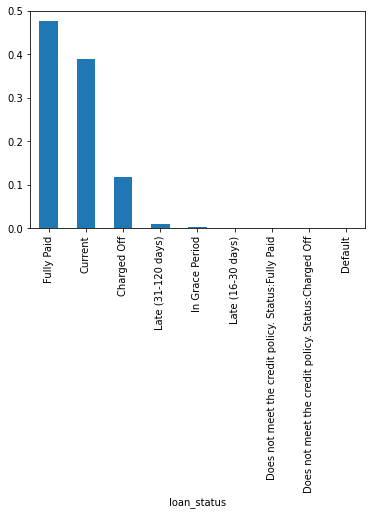

In [12]:
# Plot total of loan_status
loan_data['loan_status'].value_counts(normalize = True).plot(kind='bar')

Definition of every attributes from [Lending Club Loan Analysis](https://github.com/JifuZhao/Lending-Club-Loan-Analysis/blob/master/2.%20Data%20Cleaning.ipynb) is given below (original source can't be accessed)

| Loan Status | Definition |
| :-- | :-- |
| Current | Loan is up to date on all outstanding payments |
| Fully Paid | Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment |
| Default | Loan has not been current for 121 days or more |
| Charged Off | Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance
| In Grace Period | Loan is past due but within the 15-day grace period |
| Late (16-30) | Loan has not been current for 16 to 30 days |
| Late (31-120) | Loan has not been current for 31 to 120 days |

The loan data only has final status when the data is recorded. Thus, attribute `Current`, `In Grace Period`, `Late (16-30)`, and `Late (31-120)` don't give good information for every month on books. Attribute with "Does not meet the credit policy" will be included in `Fully Paid` or `Charged Off` based on its status.

First, drop data with attribute `Current`, `In Grace Period`, `Late (16-30)`, and `Late (31-120)`.

In [6]:
# Keep attributes: 'Fully Paid', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Fully Paid', and
# 'Does not meet the credit policy. Status:Charged Off' 
loan_performance = loan_data[loan_data['loan_status'].isin(['Fully Paid', 
                                                            'Charged Off',
                                                            'Default',
                                                            'Does not meet the credit policy. Status:Fully Paid',
                                                            'Does not meet the credit policy. Status:Charged Off'])].copy()

# Check the data shape
loan_performance.shape

(1348099, 151)

Next, we convert attributes on `loan_status` to boolean from definition of 'good' and 'bad' loan.

| Loan Status | Target |
| :-- | :--: |
| `Fully Paid`, `Does not meet the credit policy. Status:Fully Paid` | 0 |
| `Charged Off`, `Default`, `Does not meet the credit policy. Status:Charged Off` | 1 |

In [7]:
# Check distribution of loan status
loan_performance['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid                                             0.798718
Charged Off                                            0.199213
Does not meet the credit policy. Status:Fully Paid     0.001475
Does not meet the credit policy. Status:Charged Off    0.000564
Default                                                0.000030
Name: proportion, dtype: float64

In [8]:
# Convert loan status as boolean
loan_performance['loan_status'] = loan_performance['loan_status'].map({'Fully Paid' : 0,
                                                                       'Does not meet the credit policy. Status:Fully Paid' : 0,
                                                                       'Charged Off' : 1,
                                                                       'Default' : 1,
                                                                       'Does not meet the credit policy. Status:Charged Off' : 1})

# Check the distributionn
loan_performance['loan_status'].value_counts(normalize = True)

loan_status
0    0.800193
1    0.199807
Name: proportion, dtype: float64

- Bad loan has high proportion (20%) and can be differ if we have full payment history since there is chance that the 'fully paid' and 'current' status have ever past due. We ignore 'current' status is also ignore almost 40% of all data.
- For our loan data, there are 2 term: 36 months and 60 months. We will check its distribution

In [9]:
loan_performance['term'].value_counts(normalize = True)

term
 36 months    0.758999
 60 months    0.241001
Name: proportion, dtype: float64

Since number of observation for term '36 months' approximately 3 times of term '60 months', we will choose to focus on '36 months'.

In [10]:
# Keep attribute '36 months' only on 'term'
loan_performance = loan_performance[loan_performance['term'].isin([' 36 months'])].copy()

# Check the data shape
loan_performance.shape

(1023206, 151)

* Now, only 1023206 observations left 

#### Create the Cohort Table

In order to get months balance, we need to convert important date from string to numeric. There are two important dates: `issue_d` which determine month when the loan funded and `last_pymnt_d` which determine last payment was received.

In [11]:
# Make sure there is no null value on date
total_null_issue_d = loan_performance['issue_d'].isna().sum()
total_null_last_pymnt_d = loan_performance['last_pymnt_d'].isna().sum()

print('Total null value on issue_d      :', total_null_issue_d)
print('Total null value on last_pymnt_d :', total_null_last_pymnt_d)

Total null value on issue_d      : 0
Total null value on last_pymnt_d : 1704


Check `loan_status` on data with null value on `last_pymnt_d`.

In [12]:
# Check loan status on last_pymnt_d
null_last_pymnt_d = loan_performance[loan_performance['last_pymnt_d'].isna()]
null_last_pymnt_d['loan_status'].value_counts()

loan_status
1    1704
Name: count, dtype: int64

Now, we know that all null values on last payment date are sourced from bad loans. We can fill in by the same date of issue date as they don't do the payment at all.

In [13]:
# Replacee null values on last_pymnt_d with value on issue_d
loan_performance['last_pymnt_d'] = loan_performance['last_pymnt_d'].fillna(loan_performance['issue_d'])

Convert the dates into datetime format.

In [14]:
# Convert date to numeric value
loan_performance['issue_d'] = pd.to_datetime(loan_performance['issue_d'],
                                             format = '%b-%Y')

loan_performance['last_pymnt_d'] = pd.to_datetime(loan_performance['last_pymnt_d'],
                                                  format = '%b-%Y')

Since the issue date of the loan is from 2007 until 2019, number of months become overmuch. Thus, we will use quarter to make it simpler.

In [15]:
# Convert date into quarter
loan_performance['issue_d'] = loan_performance['issue_d'].dt.to_period('Q')
loan_performance['last_pymnt_d'] = loan_performance['last_pymnt_d'].dt.to_period('Q')

Now, we will only work with column `id`, `issue_d`, `last_pymnt_d`, and `loan_status` for cohort table.

In [16]:
# Create sub loan performance data
sub_loan = loan_performance[['id', 'issue_d', 'last_pymnt_d', 'loan_status']].copy()

sub_loan.head()

,id,issue_d,last_pymnt_d,loan_status
0,68407277,2015Q4,2019Q1,0
1,68355089,2015Q4,2016Q2,0
5,68426831,2015Q4,2017Q2,0
6,68476668,2015Q4,2016Q4,0
7,67275481,2015Q4,2017Q1,0


In [17]:
# Create column for window or total quarters on books
sub_loan['window'] = (sub_loan['last_pymnt_d'] - sub_loan['issue_d'])
sub_loan['window'] = sub_loan['window'].apply(lambda x: x.n)

sub_loan.head()


,id,issue_d,last_pymnt_d,loan_status,window
0,68407277,2015Q4,2019Q1,0,13
1,68355089,2015Q4,2016Q2,0,2
5,68426831,2015Q4,2017Q2,0,6
6,68476668,2015Q4,2016Q4,0,4
7,67275481,2015Q4,2017Q1,0,5


In [18]:
# Create column for open account date (0 for the first issue date: 2007Q2)
sub_loan['open'] = (sub_loan['issue_d'] - sub_loan['issue_d'].min())
sub_loan['open'] = sub_loan['open'].apply(lambda x: x.n)

sub_loan.head()

,id,issue_d,last_pymnt_d,loan_status,window,open
0,68407277,2015Q4,2019Q1,0,13,34
1,68355089,2015Q4,2016Q2,0,2,34
5,68426831,2015Q4,2017Q2,0,6,34
6,68476668,2015Q4,2016Q4,0,4,34
7,67275481,2015Q4,2017Q1,0,5,34


We will cohort table for vintage analysis. Numpy array wil be used to compute development of cumulative bad rate for every issue date.

In [19]:
# Compute max quarter from first issue date
max_quarter = sub_loan['open'].nunique()

# Initialize numpy array for cohort table and fill by null values
cohort_np = np.empty([max_quarter, max_quarter])
cohort_np.fill(np.nan)

# Loop over row or issue date (start from 2007Q2 until 2008Q4)
for row in range(max_quarter):
    # Compute total loan issued on issue date
    total_acc = len(sub_loan[sub_loan['open'] == row])
    
    # Loop over colum or time on books (quarters)
    for column in range(max_quarter-row):
        # Compute cumulative bad loan on every time on book from issue date
        bad_acc = len(sub_loan[(sub_loan['open'] == row) & (sub_loan['loan_status'] == 1) & (sub_loan['window'] <= column)])

        # Fill cohort table by cumulative bad rate
        cohort_np[row][column] = bad_acc/total_acc

# Print the cohort table
with np.printoptions(threshold = np.inf, linewidth = np.inf):
    print(cohort_np)

[[0.         0.         0.         0.         0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125      0.125     ]
 [0.         0.         0.03157895 0.04210526 0.07894737 0.10526316 0.12631579 0.15789474 0.16842105 0.17894737 0.20526316 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.210

Convert cohort table from numpy array to pandas dataframe.

In [20]:
# Convert cohort table to pandas dataframe
cohort = pd.DataFrame(cohort_np, columns=[x for x in range(max_quarter)])

# Convert index into value on issue_d 
index_issue = sorted(sub_loan['issue_d'].unique().astype(str))
cohort.index = index_issue

# Display cohort table 
with pd.option_context('display.max_columns', 1000):
    display(cohort)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
2007Q2,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125
2007Q3,0.000000,0.000000,0.031579,0.042105,0.078947,0.105263,0.126316,0.157895,0.168421,0.178947,0.205263,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,0.210526,NaN
2007Q4,0.002571,0.028278,0.048843,0.077121,0.118252,0.182519,0.210797,0.223650,0.246787,0.262211,0.277635,0.285347,0.287918,0.287918,0.290488,0.293059,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,0.295630,NaN,NaN
2008Q1,0.004936,0.022705,0.048371,0.090819,0.109576,0.134255,0.153011,0.172754,0.200395,0.210267,0.218164,0.228036,0.230010,0.230010,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,0.230997,NaN,NaN,NaN
2008Q2,0.008032,0.030120,0.046185,0.072289,0.108434,0.132530,0.148594,0.170683,0.186747,0.196787,0.210843,0.216867,0.218876,0.218876,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,0.220884,NaN,NaN,NaN,NaN
2008Q3,0.010067,0.016779,0.040268,0.060403,0.087248,0.104027,0.130872,0.140940,0.154362,0.164430,0.167785,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,0.174497,NaN,NaN,NaN,NaN,NaN
2008Q4,0.001712,0.020548,0.039384,0.063356,0.083904,0.104452,0.119863,0.133562,0.148973,0.152397,0.159247,0.166096,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,0.171233,NaN,NaN,NaN,NaN,NaN,NaN
2009Q1,0.001117,0.024581,0.037989,0.052514,0.064804,0.074860,0.088268,0.099441,0.113966,0.120670,0.126257,0.134078,0.135196,0.135196,0.136313,0.136313,0.136313,0.136313,0.136313,0.136313,0.136313,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,0.137430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009Q2,0.007286,0.024590,0.037341,0.052823,0.068306,0.080146,0.099271,0.114754,0.121129,0.127505,0.134791,0.142077,0.142987,0.142987,0.142987,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,0.143898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009Q3,0.003666,0.017595,0.027859,0.043255,0.054985,0.068915,0.075513,0.089443,0.105572,0.112903,0.119501,0.123900,0.124633,0.125367,0.125367,0.125367,0.126100,0.127566,0.127566,0.1

Vizualize the cohort table in heatmap to make it easier for analysis.

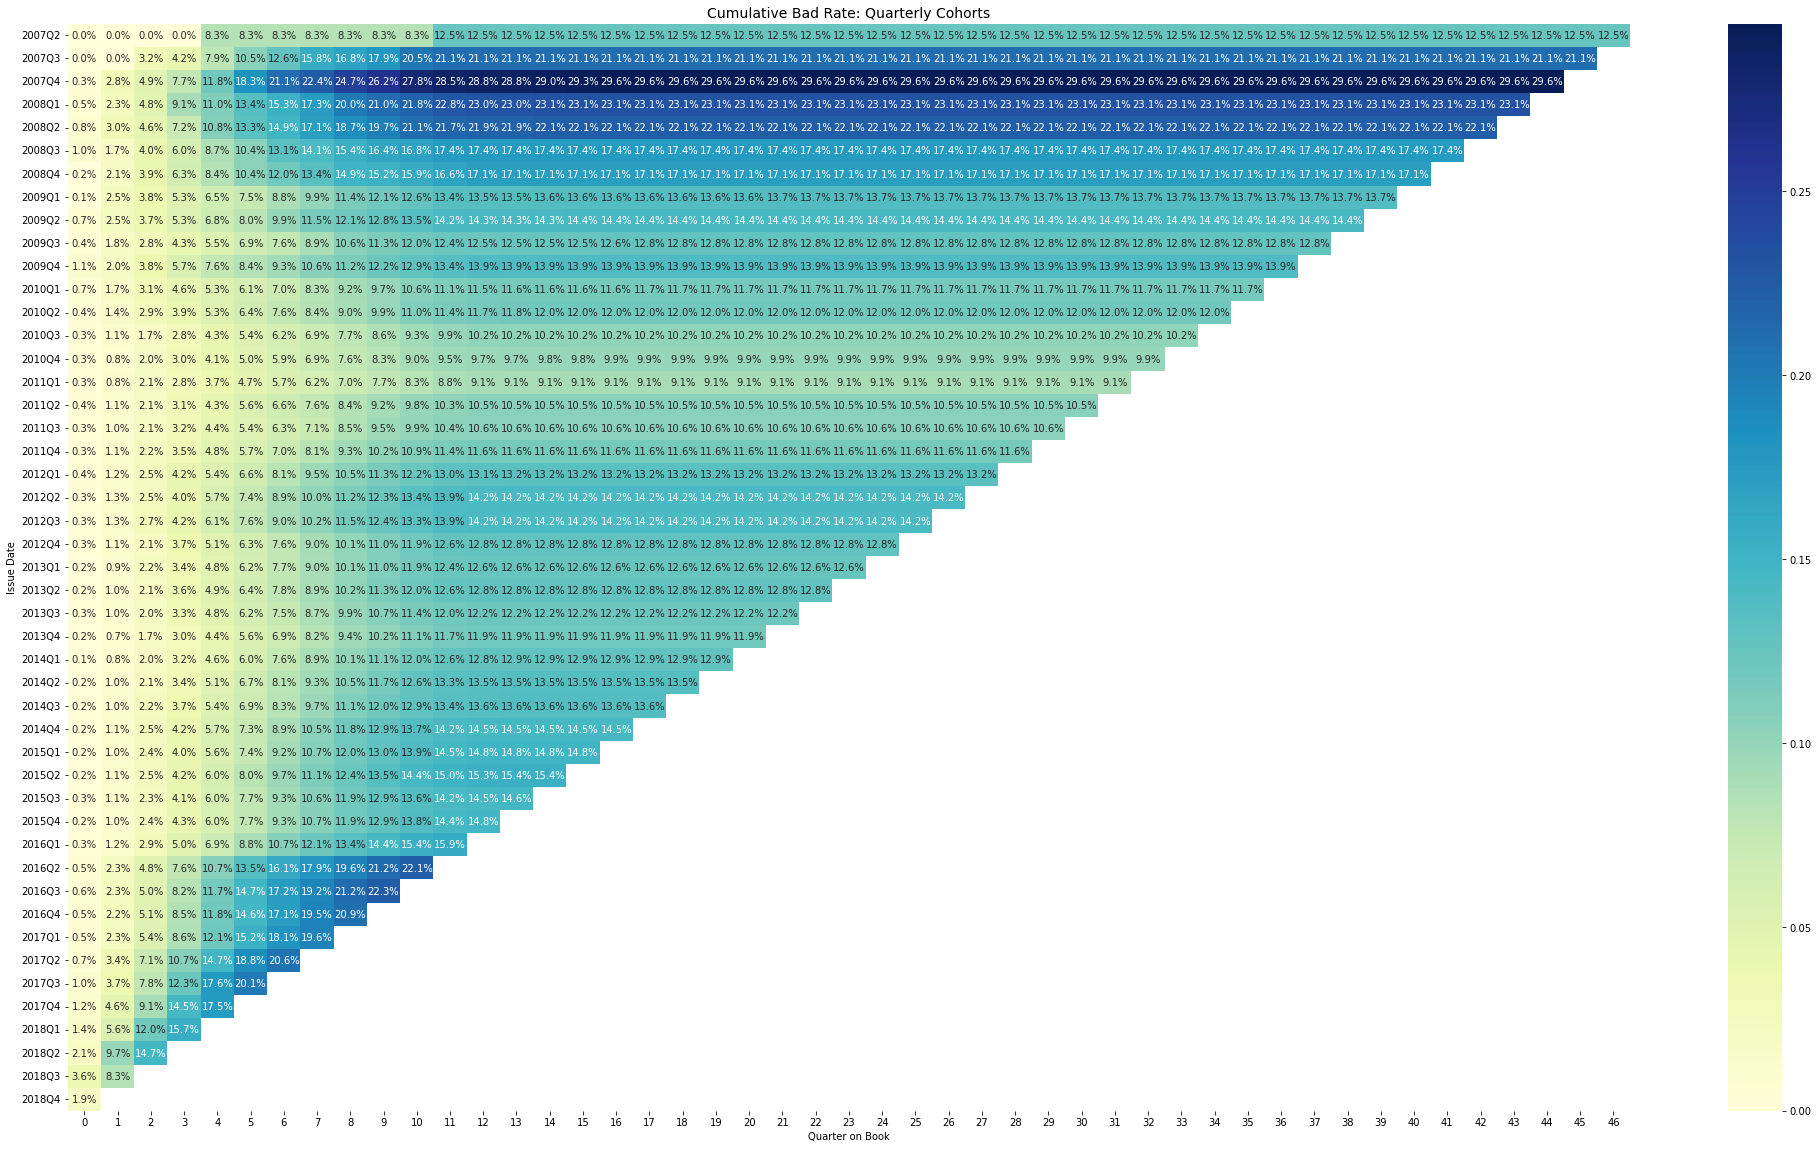

In [21]:
plt.figure(figsize = (35,20))

plt.title('Cumulative Bad Rate: Quarterly Cohorts',
          fontsize = 14)

# Create the heatmap
sns.heatmap(data = cohort,
            annot = True,
            fmt = '.1%',
            cmap = 'YlGnBu')

plt.ylabel('Issue Date')
plt.xlabel('Quarter on Book')
plt.yticks(rotation = 'horizontal')
plt.show()

We need create plot for total of account issued every year to support the cohort table.

<Axes: xlabel='issue_d'>

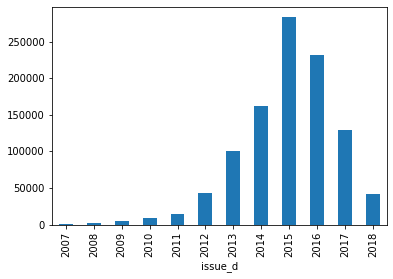

In [22]:
# Plot total of account issued every year
sub_loan.groupby(sub_loan['issue_d'].dt.year).count()['issue_d'].plot(kind='bar')

Analysis:
* We get relatively high bad rate loan which might happen because we ignore observations with 'current' loan status that has big proportion on original loan data.
* For issue date 2007Q2 until 2015Q4, the time taken for accounts to mature around 12 or 13 quarters. This result is expected since the term of loan is 36 months or 12 quarters.
* High bad rate loan occurs on early issued loan (2007-2008) when the number of accounts issued is still low (small data). Moreover, on that range time, also happen Global Financial Crisis which can shift the sample distribution.
* Another local peak bad rate happen on loan that issued on 2012Q2-2012Q3, even though the number not as high on 2007-2008.
* Also note that current bad rate of issued loan on 2014Q4-2015Q4 has high value around 14%-16%.

Define sample window:
* We will choose issued loan on 2007Q2-2015Q4 as sample windows and split it into train and test set.

#### Characteristics Selection

In [23]:
# Shape of the loan data
loan_performance.shape

(1023206, 151)

We still have 151 columns which is too many for credit scorecard development. Thus, we will drop many of them. 

First, we will check columns with many null values.

In [24]:
# Get list of characteristics with many null values
null_var = loan_performance.isnull().mean()
null_var[null_var > 0.4].sort_values()

mths_since_last_delinq                        0.502025
open_rv_12m                                   0.592432
total_cu_tl                                   0.592432
inq_fi                                        0.592432
max_bal_bc                                    0.592432
open_rv_24m                                   0.592432
total_bal_il                                  0.592432
open_il_24m                                   0.592432
inq_last_12m                                  0.592432
open_act_il                                   0.592432
open_il_12m                                   0.592432
open_acc_6m                                   0.592432
all_util                                      0.592478
mths_since_rcnt_il                            0.604439
il_util                                       0.649935
mths_since_recent_revol_delinq                0.662927
mths_since_last_major_derog                   0.733424
mths_since_recent_bc_dlq                      0.761390
mths_since

* We will drop column with more than 0.9 null values
* Do more investigation on column with 0.5 - 0.8 null values based on its description.

In [25]:
# Drop the columns of characteristic with more than 90% null values
loan_performance = loan_performance.drop(columns = list(null_var[null_var > 0.9].index))

# Check the data shape
loan_performance.shape 

(1023206, 112)

We have drop 39 columns from columns with more than 90% null values. Next, investigate columns with more than 50% null values.

In [26]:
# Update columns with many null values
null_var = loan_performance.isnull().mean()
null_var[null_var > 0.5].sort_values()

mths_since_last_delinq            0.502025
inq_last_12m                      0.592432
total_cu_tl                       0.592432
open_acc_6m                       0.592432
open_act_il                       0.592432
open_il_12m                       0.592432
open_il_24m                       0.592432
total_bal_il                      0.592432
inq_fi                            0.592432
open_rv_12m                       0.592432
open_rv_24m                       0.592432
max_bal_bc                        0.592432
all_util                          0.592478
mths_since_rcnt_il                0.604439
il_util                           0.649935
mths_since_recent_revol_delinq    0.662927
mths_since_last_major_derog       0.733424
mths_since_recent_bc_dlq          0.761390
mths_since_last_record            0.825952
dtype: float64

* Null values on columns with prefixed by `mths_since` means 0 or never happened. 
* Because all those columns are recorded during performance window and we only need characteristics 'before' issue the loan to predict the loan status, then we can drop all those columns.

In [27]:
# Drop the columns of characteristic with more than 50% null values
loan_performance = loan_performance.drop(columns = list(null_var[null_var > 0.5].index))

# Check the data shape
loan_performance.shape 

(1023206, 93)

Next, we can check the characteristics by its unique values.

In [28]:
# Display number of unique values of every remaining characteristics
with pd.option_context('display.max_rows', 1000):
    display(loan_performance.nunique().sort_values())

hardship_flag                       1
policy_code                         1
term                                1
pymnt_plan                          1
debt_settlement_flag                2
application_type                    2
initial_list_status                 2
loan_status                         2
disbursement_method                 2
verification_status                 3
num_tl_30dpd                        5
home_ownership                      6
num_tl_120dpd_2m                    6
grade                               7
acc_now_delinq                      8
emp_length                         11
chargeoff_within_12_mths           11
pub_rec_bankruptcies               12
purpose                            14
collections_12_mths_ex_med         15
num_tl_90g_dpd_24m                 25
mths_since_recent_inq              26
out_prncp_inv                      26
out_prncp                          26
delinq_2yrs                        28
inq_last_6mths                     28
num_tl_op_pa

* Obviously we can drop characteristics with 1 unique values: `hardship_flag`, `policy_code`, `term`, and `pymnt_plan`
* We also can drop characteristics with all unique values: `id` and `url`

In [29]:
# Drop the columns of characteristic with 1 unique value and 100% unique values
loan_performance = loan_performance.drop(columns=['hardship_flag', 'policy_code', 'term', 'pymnt_plan', 'id', 'url'])

# Check the data shape
loan_performance.shape

(1023206, 87)

In [30]:
# Remaining columns
loan_performance.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeo

We drop all columns of characteristics which recorded on performance window and keep informations that related to application of the loan.

In [31]:
drop_cols = ['funded_amnt', 'funded_amnt_inv', 'installment', 'emp_title', 'title',
             'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
             'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
             'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
             'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
             'delinq_amnt', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq',
             'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
             'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'total_il_high_credit_limit',
             'debt_settlement_flag', 'disbursement_method', 'last_pymnt_d', 'sub_grade', 'zip_code', 
             'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_acc']

# Drop the columns of variable ...
loan_performance = loan_performance.drop(columns=drop_cols)

# Check the data shape
loan_performance.shape

(1023206, 32)

### **1.3 Split the Data**

In [32]:
# Check the remaining data
with pd.option_context('display.max_rows', 1000):
    display(loan_performance.head().T)

,0,1,5,6,7
loan_amnt,3600.0,24700.0,11950.0,20000.0,20000.0
int_rate,13.99,11.99,13.44,9.17,8.49
grade,C,C,C,B,B
emp_length,10+ years,10+ years,4 years,10+ years,10+ years
home_ownership,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE
annual_inc,55000.0,65000.0,34000.0,180000.0,85000.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Not Verified
issue_d,2015Q4,2015Q4,2015Q4,2015Q4,2015Q4
loan_status,0,0,0,0,0
purpose,debt_consolidation,small_business,debt_consolidation,debt_consolidation,major_purchase


* We will split the data into sample data from 2007Q2 until 2015Q4. Next, we split the sample into train data and validation data for modelling.

In [33]:
# Define the final date for sample data
final_date = pd.to_datetime('Dec-2015', format = '%b-%Y').to_period('Q')

# Split the data into sample data and test data
data_sample = loan_performance.loc[loan_performance['issue_d'] <= final_date]

print('Total rows of sample data :', data_sample.shape[0])

Total rows of sample data : 621022


Check the proportion of loan status on sample data.

In [34]:
# Set the response variable
response_variable = 'loan_status'

# Check the proportion of loan status on sample data
data_sample[response_variable].value_counts(normalize = True)

loan_status
0    0.860546
1    0.139454
Name: proportion, dtype: float64

Next, we split the sample data into train data and test data.

In [35]:
from sklearn.model_selection import  train_test_split

# Split the data
data_train, data_test = train_test_split(data_sample,
                                         stratify = data_sample[response_variable],
                                         test_size = 0.3,
                                         random_state = 42)

print('data train shape :', data_train.shape)
print('data test shape  :', data_test.shape)

data train shape : (434715, 32)
data test shape  : (186307, 32)


Finally, we can export the data into csv for EDA.

In [36]:
# Drop 'issue_d' from dataset
data_train = data_train.drop(columns = ['issue_d'], axis = 1)
data_test = data_test.drop(columns = ['issue_d'], axis = 1)

In [37]:
# Export train data and test data to csv
data_train.to_csv('train.csv', index=False)
data_test.to_csv('test.csv', index=False)